## 0. 라이브러리 

In [27]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from scipy import stats
from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm

In [34]:
import scipy
from scipy.stats import shapiro
from scipy import stats

## 실습 1

In [30]:
# 정규성 검정(Normality Test)
ds_camshaft = pd.read_csv("D:/data/1/2sample_t_test.csv") 
ds_camshaft.head() 

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [31]:
data1 = ds_camshaft['Mat_A']
data2 = ds_camshaft['Mat_B']
shapiro(data1)
print(shapiro(data2))

ShapiroResult(statistic=nan, pvalue=1.0)


In [32]:
shapiro(data2)

ShapiroResult(statistic=nan, pvalue=1.0)

변수 Mat_A와 변수 Mat_B는 정규성 검정결과 p-value가 0.05보다 크므로 정규분포를 따르다는 것을 알 수 있습니다.

## 실습 2

In [38]:
# 모평균 구간추정
df = pd.DataFrame({"sample":[18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [39]:
lower,upper = stats.norm.interval(0.95, loc=np.mean(df), scale=3.8/np.sqrt(20))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([17.83],[21.17])


c:\dev\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


평균 무게에 대한 95% 신뢰구간은 17.83에서 21.17 사이입니다.

## 실습 3

In [37]:
df = pd.DataFrame({"sample":[73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
lower,upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale= scipy.stats.sem(df))
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([70.6],[72.4])


모평균값의 95% 신뢰구간의 범위는 70.6에서 72.4 입니다.

## 실습 4

In [54]:
# 1-Sample, t-test
df = pd.DataFrame({'sample':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
t_result = stats.ttest_1samp(df,78.0)

In [55]:
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sample t-test
t 통계량: [3.379]
p-value: [0.008]


귀무가설: 개선활동이 만족도를 변화시키지 않았습니다.  
대립가설: 개선활동이 만족도를 변화시켰습니다.  
유의수준 5%에서 검정 결과 P값이 0.008이므로 개선활동이 만족도를 변화시켰다고 볼 수 있습니다.  
개선활동을 채택했습니다.  

## 실습 5

In [45]:
# 2-Sample t-test : 두 집단 간 평균이 같은지 비교

df = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})

<AxesSubplot:>

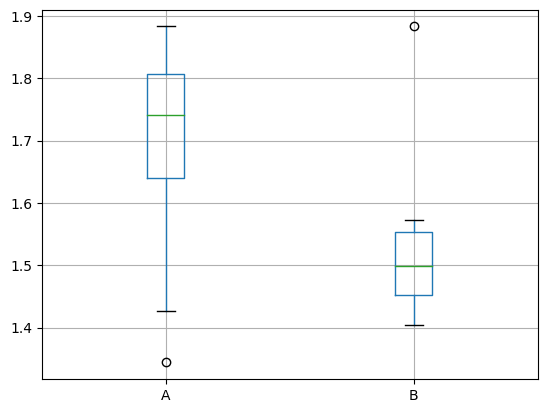

In [47]:
df.boxplot(['A','B']) 

In [50]:
t_result = stats.ttest_ind(df['A'],df['B']) #Sample t-test 시행
t, p = t_result.statistic.round(3), t_result.pvalue.round(3) #시행값 저장

In [51]:
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:1.7
p:0.111


귀무가설: 공급자 간에 모평균에 차이가 없습니다.  
대립가설: 공급자 간에 모평균에 차이가 있습니다.  
유의수준 5%에서 검정 결과 P값이 0.111이므로 공급자가 간에 모평균에 차이가 없다고 볼 수 있습니다.  
귀무가설을 채택했습니다.  

## 실습 6

In [56]:
# Paired t-test: 짝을 일는 집단의 평균의 차이가 있는지 검정
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]}) 
df2 = pd.DataFrame({'after':[710,580,787,712,750,600,782,670,790,680]})  

In [57]:
t_result = stats.ttest_rel(df1,df2) 
t,p = t_result.statistic.round(3), t_result.pvalue.round(4)

print("Paired t-test") 
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.0497]


귀무가설: 성적이 학원을 가기전과 차이가 없습니다.  
대립가설: 성적이 학원을 가기전과 차이가 있습니다.  
p값이 0.05, p<=0.05 이므로 성적이 학원을 가기전과 차이가 있다고 볼 수 있습니다.  
대립가설을 채택했습니다.  

## 실습 7

In [58]:
# 1 Proportion test
count = 40 
n_obs = 100 
value = 0.5 

In [60]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest(count, n_obs, value)

print("2 Proprotion test")
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

2 Proprotion test
z: -2.041
p:0.041


귀무가설: 동전을 던졌을 때 앞면이 나올 것입니다.  
대립가설: 동전을 던졌을 때 앞면이 나오지 않을 것입니다.  
p값이 0.0041, p<=0.05이므로 동전을 던졌을 때 앞면이 나오지 않을 것입니다.  
대립가설을 채택했습니다.  

## 실습 8

In [61]:
# 2 Proportion test
count = np.array([14,5]) 
nobs = np.array([1200,1200]) 

In [62]:
stat, pval = proportions_ztest(count, nobs)
print("2 Proprotion test")
print('z: {0:0.3f}'.format(stat))
print("p:{0:0.3f}".format(pval))

2 Proprotion test
z: 2.073
p:0.038


귀무가설: 두 공정의 불량률에 차이가 없습니다.  
대립가설: 두 공정의 불량률에 차이가 있습니다.  
p값이 0.038, p<0.05 이므로 두 공정의 불량률에 차이가 있다고 볼 수 있습니다.  
대립가설을 채택했습니다. 

## 실습 9

In [63]:

# 카이제곱 검정
df = pd.DataFrame({
    'A':[18,1,8,7,10,9,10],
'B':[8,2,14,5,5,9,4],
'C':[4,1,3,4,9,5,4],
'D':[4,1,2,3,2,7,3],
'E':[3,1,3,1,1,1,1],
'F':[3,25,8,10,2,1,7]})

In [64]:
chi,pval,dof,expected = stats.chi2_contingency(df.T) 

print("chi-squre test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))

chi-squre test
chisq: 98.274
p: 0.000
degree pf freedom: 30



귀무가설: 각 제품에 대한 이미지에 대해 차이가 없습니다.  
대립가설: 각 제품에 대한 이미지에 대해 차이가 있습니다.  
p값이 0, p<0.05 이므로 각 제품에 대한 이미지에 대해 차이가 있다고 볼 수 있습니다.  

## 실습 10

## 실습 11